In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer

%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette('magma')

In [2]:
df = pd.read_csv('Datasets/us_ev_parking.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1869 entries, 0 to 1868
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   zip               1868 non-null   float64
 1   facility_type     1850 non-null   object 
 2   ev_slow           1834 non-null   float64
 3   ev_dc_fast_count  1834 non-null   float64
 4   spaces            254 non-null    float64
dtypes: float64(4), object(1)
memory usage: 73.1+ KB


In [4]:
df.dropna(subset=['zip'], axis = 0, inplace = True)

In [5]:
df['zip'] = df['zip'].astype(int)

In [6]:
df = df.set_index('zip', drop = True)

In [7]:
df.isnull().sum()

facility_type         18
ev_slow               34
ev_dc_fast_count      34
spaces              1615
dtype: int64

In [8]:
df.dropna(subset = ['facility_type', 'ev_slow'], axis = 0, inplace = True)

In [9]:
df.isnull().sum()

facility_type          0
ev_slow                0
ev_dc_fast_count       0
spaces              1615
dtype: int64

In [10]:
df = df.applymap(lambda x: x.lower() if type(x) == str else x)

In [11]:
df.replace(' ', '_', regex = True, inplace = True)

<AxesSubplot:>

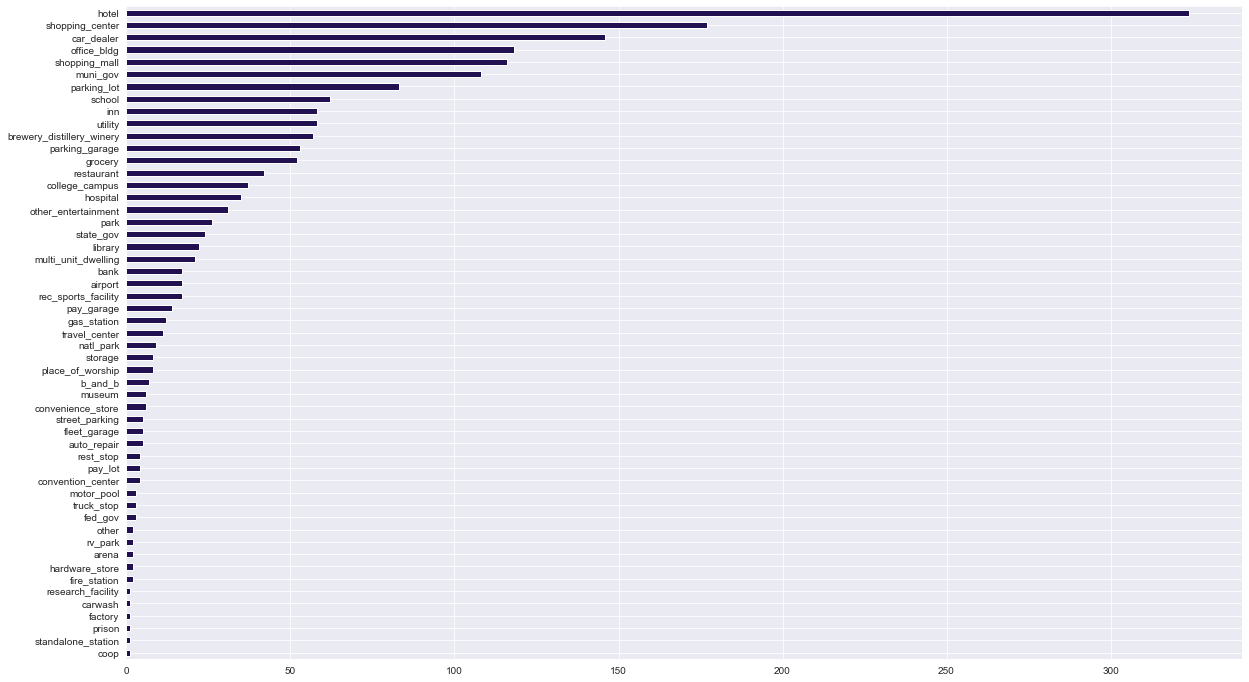

In [12]:
plt.figure(figsize = (20,12))
df['facility_type'].value_counts(ascending=True).plot(kind = 'barh')

In [13]:
df['facility_type'].unique()

array(['storage', 'street_parking', 'utility', 'college_campus', 'museum',
       'office_bldg', 'parking_garage', 'hotel', 'parking_lot',
       'pay_garage', 'bank', 'car_dealer', 'hospital', 'shopping_mall',
       'restaurant', 'muni_gov', 'multi_unit_dwelling',
       'other_entertainment', 'standalone_station', 'shopping_center',
       'state_gov', 'airport', 'grocery', 'park', 'prison', 'auto_repair',
       'rec_sports_facility', 'school', 'gas_station', 'pay_lot',
       'convenience_store', 'fleet_garage', 'library',
       'convention_center', 'hardware_store', 'natl_park', 'carwash',
       'rv_park', 'fire_station', 'arena', 'inn', 'travel_center',
       'brewery_distillery_winery', 'other', 'place_of_worship',
       'research_facility', 'motor_pool', 'rest_stop', 'factory',
       'truck_stop', 'b_and_b', 'fed_gov', 'coop'], dtype=object)

In [14]:
df.facility_type = df.facility_type.map({'storage': 'others',
                                         'street_parking': 'parking_lot',
                                         'utility': 'government',
                                         'college_campus': 'school', 
                                         'museum': 'landmarks',
                                         'office_bldg': 'office', 
                                         'parking_garage': 'parking_lot', 
                                         'hotel': 'hotel', 
                                         'parking_lot': 'parking_lot',
                                         'pay_garage': 'parking_lot', 
                                         'bank': 'office', 
                                         'car_dealer': 'car_dealer', 
                                         'hospital': 'hospital', 
                                         'shopping_mall': 'shopping_mall',
                                         'restaurant': 'restaurant', 
                                         'muni_gov': 'parking_lot', 
                                         'multi_unit_dwelling': 'parking_lot',
                                         'other_entertainment': 'others', 
                                         'standalone_station': 'gas_station', 
                                         'shopping_center': 'shopping_mall',
                                         'state_gov': 'government', 
                                         'airport': 'airport', 
                                         'grocery': 'others', 
                                         'park': 'landmarks', 
                                         'prison': 'others', 
                                         'auto_repair': 'others',
                                         'rec_sports_facility': 'others', 
                                         'school': 'school', 
                                         'gas_station': 'gas_station', 
                                         'pay_lot': 'parking_lot', 
                                         'convenience_store': 'others', 
                                         'fleet_garage': 'others', 
                                         'library': 'others',
                                         'convention_center': 'others', 
                                         'hardware_store': 'shopping_mall', 
                                         'natl_park' : 'landmarks', 
                                         'carwash': 'others',
                                         'rv_park': 'others', 
                                         'fire_station': 'others', 
                                         'arena': 'landmarks', 
                                         'inn': 'hotel', 
                                         'travel_center': 'others',
                                         'brewery_distillery_winery': 'landmarks', 
                                         'other': 'others', 
                                         'place_of_worship': 'landmarks',
                                         'research_facility': 'others', 
                                         'motor_pool': 'others', 
                                         'rest_stop': 'gas_station', 
                                         'factory': 'others',
                                         'truck_stop': 'others', 
                                         'b_and_b' : 'parking_lot', 
                                         'fed_gov': 'government', 
                                         'coop': 'others'
                                        }
                                       )

hotel            382
shopping_mall    295
parking_lot      295
others           178
car_dealer       146
office           135
landmarks        108
school            99
government        85
restaurant        42
hospital          35
gas_station       17
airport           17
Name: facility_type, dtype: int64


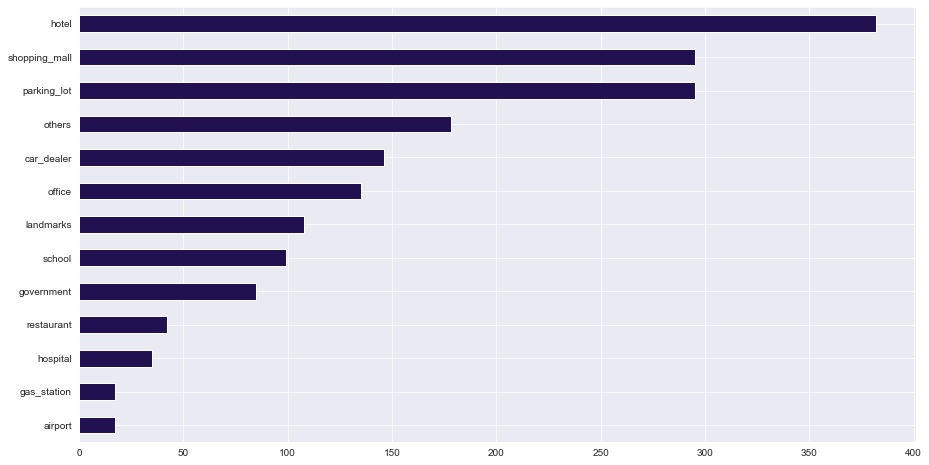

In [15]:
plt.figure(figsize = (15,8))
df['facility_type'].value_counts(ascending=True).plot(kind = 'barh')
print(df['facility_type'].value_counts())

In [16]:
df.rename(columns = {'ev_dc_fast_count': 'ev_fast'}, inplace=True)

In [17]:
df.head()

,facility_type,ev_slow,ev_fast,spaces
zip,,,,
90001,others,1.0,0.0,NaN
90002,parking_lot,1.0,0.0,NaN
90003,government,2.0,0.0,61.0
90003,government,2.0,0.0,21.0
90003,government,2.0,0.0,64.0


In [18]:
df1 = pd.get_dummies(df, columns = ['facility_type'])

In [19]:
df1.head()

,ev_slow,ev_fast,spaces,facility_type_airport,facility_type_car_dealer,facility_type_gas_station,facility_type_government,facility_type_hospital,facility_type_hotel,facility_type_landmarks,facility_type_office,facility_type_others,facility_type_parking_lot,facility_type_restaurant,facility_type_school,facility_type_shopping_mall
zip,,,,,,,,,,,,,,,,
90001,1.0,0.0,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0
90002,1.0,0.0,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0
90003,2.0,0.0,61.0,0,0,0,1,0,0,0,0,0,0,0,0,0
90003,2.0,0.0,21.0,0,0,0,1,0,0,0,0,0,0,0,0,0
90003,2.0,0.0,64.0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [20]:
df1.isnull().sum()

ev_slow                           0
ev_fast                           0
spaces                         1615
facility_type_airport             0
facility_type_car_dealer          0
facility_type_gas_station         0
facility_type_government          0
facility_type_hospital            0
facility_type_hotel               0
facility_type_landmarks           0
facility_type_office              0
facility_type_others              0
facility_type_parking_lot         0
facility_type_restaurant          0
facility_type_school              0
facility_type_shopping_mall       0
dtype: int64

In [21]:
knn_imp = KNNImputer(n_neighbors = 5, weights='uniform', )
knn_imp_parking_missing = knn_imp.fit_transform(df1)

df_imputed = pd.DataFrame(knn_imp_parking_missing, columns = df1.columns)

In [22]:
df_imputed

,ev_slow,ev_fast,spaces,facility_type_airport,facility_type_car_dealer,facility_type_gas_station,facility_type_government,facility_type_hospital,facility_type_hotel,facility_type_landmarks,facility_type_office,facility_type_others,facility_type_parking_lot,facility_type_restaurant,facility_type_school,facility_type_shopping_mall
0,1.0,0.0,264.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,3408.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2.0,0.0,61.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,21.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,64.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,7.0,0.0,229.8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1830,1.0,0.0,201.4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1831,2.0,0.0,54.6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1832,3.0,0.0,4397.8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df_imputed['spaces'] = df_imputed['spaces'].apply(np.ceil)

In [24]:
df['spaces'] = df_imputed['spaces'].values

In [25]:
df.head()

,facility_type,ev_slow,ev_fast,spaces
zip,,,,
90001,others,1.0,0.0,265.0
90002,parking_lot,1.0,0.0,3409.0
90003,government,2.0,0.0,61.0
90003,government,2.0,0.0,21.0
90003,government,2.0,0.0,64.0


<AxesSubplot:xlabel='spaces'>

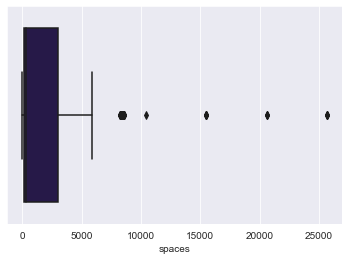

In [26]:
sns.boxplot(x = df['spaces'])

In [27]:
#outlier1 = df[(df['spaces']>5000)].index

In [28]:
#df = df.drop(outlier1, axis = 0)

In [29]:
#sns.boxplot(x = df['spaces'])

In [30]:
df.head()

,facility_type,ev_slow,ev_fast,spaces
zip,,,,
90001,others,1.0,0.0,265.0
90002,parking_lot,1.0,0.0,3409.0
90003,government,2.0,0.0,61.0
90003,government,2.0,0.0,21.0
90003,government,2.0,0.0,64.0


In [31]:
df.shape

(1834, 4)

In [32]:
df = pd.get_dummies(df, columns = ['facility_type'])

In [33]:
df

,ev_slow,ev_fast,spaces,facility_type_airport,facility_type_car_dealer,facility_type_gas_station,facility_type_government,facility_type_hospital,facility_type_hotel,facility_type_landmarks,facility_type_office,facility_type_others,facility_type_parking_lot,facility_type_restaurant,facility_type_school,facility_type_shopping_mall
zip,,,,,,,,,,,,,,,,
90001,1.0,0.0,265.0,0,0,0,0,0,0,0,0,1,0,0,0,0
90002,1.0,0.0,3409.0,0,0,0,0,0,0,0,0,0,1,0,0,0
90003,2.0,0.0,61.0,0,0,0,1,0,0,0,0,0,0,0,0,0
90003,2.0,0.0,21.0,0,0,0,1,0,0,0,0,0,0,0,0,0
90003,2.0,0.0,64.0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99362,7.0,0.0,230.0,0,0,0,0,0,0,1,0,0,0,0,0,0
99362,1.0,0.0,202.0,0,1,0,0,0,0,0,0,0,0,0,0,0
99362,2.0,0.0,55.0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [34]:
df['ev_total'] = df['ev_slow'] + df['ev_fast']

In [35]:
df.head()

,ev_slow,ev_fast,spaces,facility_type_airport,facility_type_car_dealer,facility_type_gas_station,facility_type_government,facility_type_hospital,facility_type_hotel,facility_type_landmarks,facility_type_office,facility_type_others,facility_type_parking_lot,facility_type_restaurant,facility_type_school,facility_type_shopping_mall,ev_total
zip,,,,,,,,,,,,,,,,,
90001,1.0,0.0,265.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0
90002,1.0,0.0,3409.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.0
90003,2.0,0.0,61.0,0,0,0,1,0,0,0,0,0,0,0,0,0,2.0
90003,2.0,0.0,21.0,0,0,0,1,0,0,0,0,0,0,0,0,0,2.0
90003,2.0,0.0,64.0,0,0,0,1,0,0,0,0,0,0,0,0,0,2.0


In [36]:
features = df.drop(columns = ['ev_slow', 'ev_fast', 'ev_total'], axis = 1)

In [37]:
X_slow = features
y_slow = df['ev_slow']

In [38]:
X_train, X_test, y_train, y_test  = train_test_split(X_slow, y_slow, random_state=42)

In [39]:
lr = LinearRegression()

In [40]:
lr.fit(X_train, y_train)
lr.fit(X_test, y_test)

LinearRegression()

In [41]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.05538445534871195
0.13689689715487163


In [42]:
ridge = RidgeCV(alphas = np.linspace(0.1, 10, 100))

In [43]:
ridge.fit(X_train, y_train)
ridge.fit(X_test, y_test)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [44]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.05527275197426518
0.11473782403555022


In [45]:
pred_lr = lr.predict(X_test)

Text(0, 0.5, 'Actual Values')

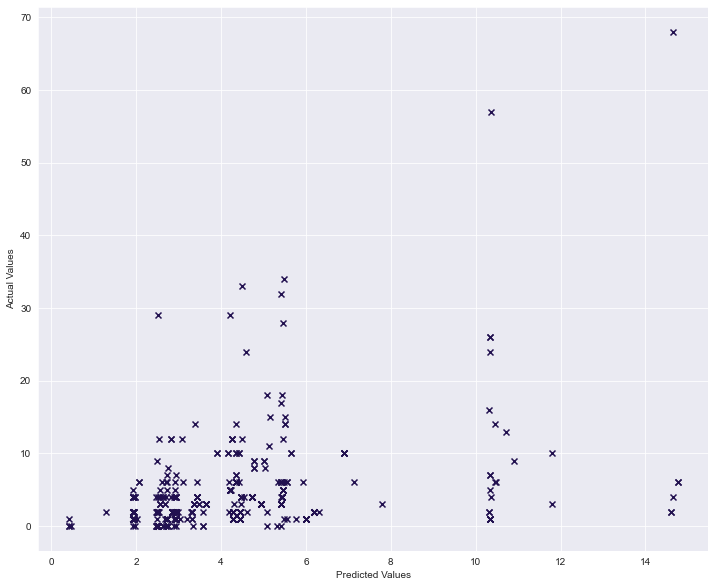

In [46]:
plt.figure(figsize = (12,10))
plt.scatter(pred_lr, y_test, marker = 'x')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [47]:
pipe = Pipeline([('ss', StandardScaler()), ('model', None)])

param_grid = [{'model': [KNeighborsClassifier()],
               'model__p': [1,2,3],
               'model__n_neighbors': [9,11,13, 15, 17],
               'model__weights': ['uniform', 'distance']},
              {'model': [RandomForestClassifier()],
               'model__n_estimators': [5,10,15,20,25,30],
               'model__max_depth': [5,6,7,8,9,10],
               'model__min_samples_split': [2,3,4,5,6,7]}
             ]


In [48]:
gs = GridSearchCV(pipe, param_grid, cv = 5, scoring = 'accuracy')

In [49]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('model', None)]),
             param_grid=[{'model': [KNeighborsClassifier(n_neighbors=13, p=1,
                                                         weights='distance')],
                          'model__n_neighbors': [9, 11, 13, 15, 17],
                          'model__p': [1, 2, 3],
                          'model__weights': ['uniform', 'distance']},
                         {'model': [RandomForestClassifier()],
                          'model__max_depth': [5, 6, 7, 8, 9, 10],
                          'model__min_samples_split': [2, 3, 4, 5, 6, 7],
                          'model__n_estimators': [5, 10, 15, 20, 25, 30]}],
             scoring='accuracy')

In [50]:
gs.best_score_

0.8072727272727273

In [51]:
gs.score(X_test, y_test)

0.8148148148148148

In [52]:
gs.best_estimator_

Pipeline(steps=[('ss', StandardScaler()),
                ('model',
                 KNeighborsClassifier(n_neighbors=13, p=1,
                                      weights='distance'))])

In [53]:
gs.best_params_

{'model': KNeighborsClassifier(n_neighbors=13, p=1, weights='distance'),
 'model__n_neighbors': 13,
 'model__p': 1,
 'model__weights': 'distance'}

In [54]:
pred_gs = gs.predict(X_test)

Text(0, 0.5, 'Actual Values')

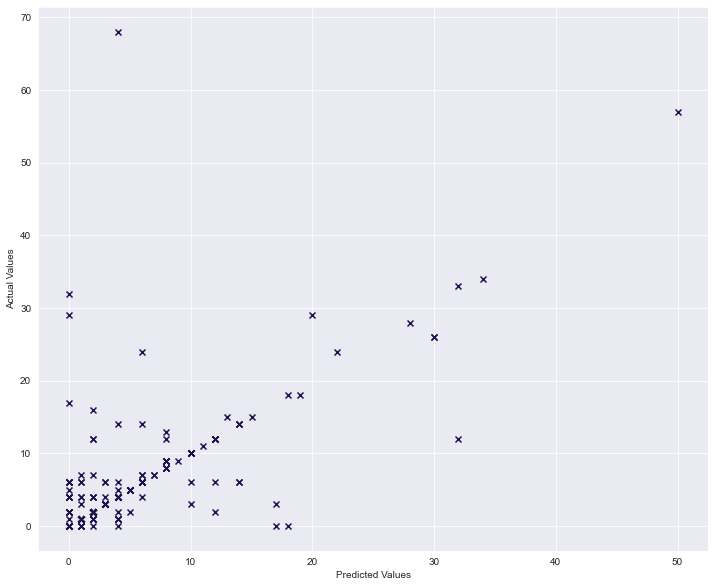

In [55]:
plt.figure(figsize = (12,10))
plt.scatter(pred_gs, y_test, marker = 'x')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [56]:
knn = KNeighborsClassifier(n_neighbors=13, p = 1, weights='distance')

In [57]:
ss = StandardScaler()

In [58]:
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [59]:
knn.fit(X_train_sc, y_train)
y_pred = knn.predict(X_test_sc)
print(accuracy_score(y_test, y_pred))

0.8148148148148148


## Predictions

In [60]:
hdb = pd.read_csv('Datasets/hdb_parking_cleaned_planningarea.csv')

In [61]:
hdb.head()

,address,x_coord,y_coord,car_park_type,type_of_parking_system,short_term_parking,free_parking,night_parking,car_park_decks,gantry_height,car_park_basement,car_park_lots,latitude,longitude,planning_area
0,BLK 270/271 ALBERT CENTRE BASEMENT CAR PARK,30314.7936,31490.4942,OTHERS,ELECTRONIC_PARKING,WHOLE_DAY,NO,1,1,1.80,1,82,1.301063,103.854118,ROCHOR
1,BLK 98A ALJUNIED CRESCENT,33758.4143,33695.5198,MULTI-STOREY_CAR_PARK,ELECTRONIC_PARKING,WHOLE_DAY,SUN_&_PH_FR_7AM-10.30PM,1,5,2.10,0,315,1.321004,103.885061,GEYLANG
2,BLK 227 ANG MO KIO ST 23,28777.0707,38973.9528,MULTI-STOREY_CAR_PARK,ELECTRONIC_PARKING,WHOLE_DAY,NO,1,6,2.15,0,225,1.368741,103.840301,ANG MO KIO
3,BLK 256A ANG MO KIO STREET 21,28267.0582,39151.8344,MULTI-STOREY_CAR_PARK,ELECTRONIC_PARKING,WHOLE_DAY,SUN_&_PH_FR_7AM-10.30PM,1,2,2.15,0,115,1.370350,103.835718,ANG MO KIO
4,BLK 308C ANG MO KIO AVE 1,29257.6457,38619.9953,MULTI-STOREY_CAR_PARK,ELECTRONIC_PARKING,7AM-10.30PM,NO,0,3,2.15,0,454,1.365540,103.844619,ANG MO KIO


In [62]:
df2 = hdb[['car_park_type', 'car_park_lots']]
df2.tail()

,car_park_type,car_park_lots
1070,MULTI-STOREY_CAR_PARK,480
1071,MULTI-STOREY_CAR_PARK,420
1072,MULTI-STOREY_CAR_PARK,437
1073,MULTI-STOREY_CAR_PARK,411
1074,MULTI-STOREY_CAR_PARK,437


In [63]:
df2.car_park_type.value_counts()

MULTI-STOREY_CAR_PARK    1018
OTHERS                     57
Name: car_park_type, dtype: int64

In [64]:
df2.car_park_type = df2.car_park_type.map({'MULTI-STOREY_CAR_PARK': 'parking_lot',
                                           'OTHERS': 'others'})

/Users/tymac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [65]:
df2.head()

,car_park_type,car_park_lots
0,others,82
1,parking_lot,315
2,parking_lot,225
3,parking_lot,115
4,parking_lot,454


In [66]:
df2 = df2.rename(columns={'car_park_lots':'spaces',
                          'car_park_type':'facility_type'})

In [67]:
df2 = pd.get_dummies(df2, columns = ['facility_type'])

In [68]:
df2.head()

,spaces,facility_type_others,facility_type_parking_lot
0,82,1,0
1,315,0,1
2,225,0,1
3,115,0,1
4,454,0,1


In [69]:
columns = ['facility_type_airport', 'facility_type_car_dealer', 'facility_type_gas_station', 'facility_type_government', 'facility_type_hospital', 'facility_type_hotel',
           'facility_type_landmarks', 'facility_type_office', 'facility_type_restaurant', 'facility_type_school', 'facility_type_shopping_mall']

In [70]:
df2_add = pd.DataFrame(columns = columns)

In [71]:
df2_add.head()

,facility_type_airport,facility_type_car_dealer,facility_type_gas_station,facility_type_government,facility_type_hospital,facility_type_hotel,facility_type_landmarks,facility_type_office,facility_type_restaurant,facility_type_school,facility_type_shopping_mall


In [72]:
df2 = pd.concat([df2, df2_add], axis = 1)

In [73]:
df2.head()

,spaces,facility_type_others,facility_type_parking_lot,facility_type_airport,facility_type_car_dealer,facility_type_gas_station,facility_type_government,facility_type_hospital,facility_type_hotel,facility_type_landmarks,facility_type_office,facility_type_restaurant,facility_type_school,facility_type_shopping_mall
0,82,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,315,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,225,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,115,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,454,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
df2.fillna(0, inplace = True)

In [75]:
pred1 = knn.predict(df2)

In [76]:
pred1

array([10.,  3.,  3., ...,  3.,  3.,  3.])

In [77]:
df3 = hdb.groupby(['planning_area', 'car_park_type'])['car_park_lots'].sum().reset_index()

In [78]:
df3.head()

,planning_area,car_park_type,car_park_lots
0,ANG MO KIO,MULTI-STOREY_CAR_PARK,8425
1,BEDOK,MULTI-STOREY_CAR_PARK,14177
2,BEDOK,OTHERS,494
3,BISHAN,MULTI-STOREY_CAR_PARK,9497
4,BOON LAY,MULTI-STOREY_CAR_PARK,391


In [79]:
df3 = df3.rename(columns={'car_park_lots':'spaces',
                          'car_park_type':'facility_type'})

In [80]:
df3 = df3.set_index('planning_area', drop=True)

In [81]:
df3.head()

,facility_type,spaces
planning_area,,
ANG MO KIO,MULTI-STOREY_CAR_PARK,8425
BEDOK,MULTI-STOREY_CAR_PARK,14177
BEDOK,OTHERS,494
BISHAN,MULTI-STOREY_CAR_PARK,9497
BOON LAY,MULTI-STOREY_CAR_PARK,391


In [82]:
df3 = pd.get_dummies(df3, columns = ['facility_type'])